In [51]:
import pandas as pd

# Load the data
file_path = 'IceHockey2023VsSalaryVsPlayer.csv'
df = pd.read_csv(file_path)

# Show the first few rows of the data
df.head()

,Player,Team,GP,G,A,Pts,+/-,PN,PIM,S,...,F%,Year,Salary,Cap Hit,_merge,Pos,Num,Height,Weight,DOB
0,Philip Tomasino,NSH,31,5,13,18,5,3,6,53,...,52.94,2023,"832,500","863,333",both,NaN,NaN,NaN,NaN,NaN
1,Luke Evangelista,NSH,24,7,8,15,7,3,6,54,...,0.00,2023,"775,000","797,500",both,NaN,NaN,NaN,NaN,NaN
2,Benoit-Olivier Groulx,ANA,2,0,0,0,0,0,0,2,...,45.00,2023,"775,000","775,000",both,NaN,NaN,NaN,NaN,NaN
3,Brock Faber,MIN,2,0,0,0,2,0,0,1,...,0.00,2023,"832,500","925,000",both,D,7.0,1.8542,90.718400,8/22/02
4,Matthew Knies,TOR,3,0,1,1,1,1,2,4,...,0.00,2023,"832,500","925,000",both,LW,23.0,1.9050,98.429464,10/17/02


In [52]:
# Drop irrelevant columns
irrelevant_columns = ['_merge', 'Num', 'DOB']
df_clean = df.drop(columns=irrelevant_columns, errors='ignore')

# Check for missing values
df_clean.isnull().sum()

Player      0
Team        0
GP          0
G           0
A           0
Pts         0
+/-         0
PN          0
PIM         0
S           0
SB          0
MS          0
H           0
GV          0
TK          0
BS          0
FW          0
FL          0
F%          0
Year        0
Salary      0
Cap Hit     0
Pos        94
Height     94
Weight     94
dtype: int64

In [53]:
# Convert numerical columns stored as strings
df_clean['Salary'] = df_clean['Salary'].str.replace(',', '').astype(float)
df_clean['Cap Hit'] = df_clean['Cap Hit'].str.replace(',', '').astype(float)

df_clean.dtypes

Player      object
Team        object
GP           int64
G            int64
A            int64
Pts          int64
+/-          int64
PN           int64
PIM          int64
S            int64
SB           int64
MS           int64
H            int64
GV           int64
TK           int64
BS           int64
FW           int64
FL           int64
F%         float64
Year         int64
Salary     float64
Cap Hit    float64
Pos         object
Height     float64
Weight     float64
dtype: object

In [54]:
# Count the number of players for each team
team_player_count = df['Team'].value_counts()

# Display the counts
team_player_count

NYI    17
EDM    16
NSH    15
STL    15
WSH    15
BUF    14
DAL    14
CAR    14
MTL    14
WPG    14
CHI    13
NYR    13
ANA    13
OTT    13
CBJ    13
COL    12
MIN    12
CGY    12
VAN    11
PIT    11
ARI    11
TBL    10
DET    10
FLA    10
BOS    10
PHI    10
SEA     9
TOR     8
Name: Team, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_18992\1960229686.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_player_count.index, y=team_player_count.values, palette='viridis')


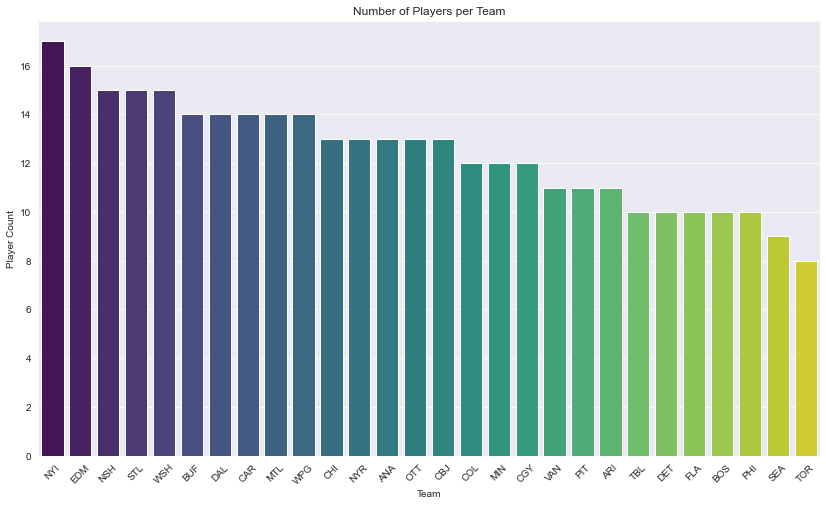

In [55]:
# Importing required libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the count of players for each team
plt.figure(figsize=(14, 8))
sns.barplot(x=team_player_count.index, y=team_player_count.values, palette='viridis')

plt.title('Number of Players per Team')
plt.xlabel('Team')
plt.ylabel('Player Count')
plt.xticks(rotation=45)
plt.show()

In [56]:
df.describe()

,GP,G,A,Pts,+/-,PN,PIM,S,SB,MS,...,GV,TK,BS,FW,FL,F%,Year,Num,Height,Weight
count,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,...,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.0,255.000000,255.000000,255.000000
mean,64.418338,13.272206,22.045845,35.318052,0.624642,14.025788,33.441261,125.372493,59.074499,49.008596,...,32.472779,29.504298,53.378223,121.386819,123.421203,27.827564,2023.0,35.858824,1.863264,90.497830
std,22.224619,12.074379,16.847462,26.987955,14.943555,8.367076,23.186404,76.107297,37.815799,30.218123,...,20.352002,18.585098,42.169406,216.034033,207.822033,24.829239,0.0,26.919311,0.055633,7.010843
min,1.000000,0.000000,0.000000,0.000000,-41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023.0,2.000000,1.727200,74.842680
25%,55.000000,4.000000,9.000000,15.000000,-8.000000,8.000000,16.000000,73.000000,30.000000,26.000000,...,17.000000,14.000000,24.000000,0.000000,0.000000,0.000000,2023.0,16.000000,1.828800,86.182480
50%,75.000000,10.000000,18.000000,29.000000,1.000000,13.000000,30.000000,121.000000,54.000000,45.000000,...,31.000000,28.000000,40.000000,5.000000,9.000000,34.210000,2023.0,26.000000,1.854200,90.718400
75%,81.000000,19.000000,32.000000,49.000000,10.000000,20.000000,44.000000,175.000000,78.000000,67.000000,...,45.000000,42.000000,71.000000,120.000000,150.000000,48.330000,2023.0,55.000000,1.905000,95.254320
max,82.000000,65.000000,90.000000,155.000000,45.000000,42.000000,136.000000,367.000000,189.000000,140.000000,...,105.000000,92.000000,196.000000,977.000000,869.000000,100.000000,2023.0,97.000000,2.032000,116.573144


In [57]:
from scipy.stats import shapiro


# Update the test_normality function to include additional checks
def test_normality_with_checks(test_df, columns, alpha=0.05):
    """
    Test normality of each specified column in the DataFrame, with additional checks for common issues.
    
    Parameters:
        test_df (pd.DataFrame): The DataFrame containing the data.
        columns (list): List of column names to test for normality.
        alpha (float): Significance level, default is 0.05.
        
    Returns:
        dict: A dictionary where keys are column names and values are 
              a tuple (is_normal (bool), p_value (float), comment (str)).
    """
    results = {}
    for column in columns:
        # Drop NaN values for testing
        data = test_df[column].dropna()
        
        # Check if there are enough data points
        if len(data) < 3:
            results[column] = (None, None, "Insufficient data points")
            continue

        # Check if the column has non-constant values
        if data.nunique() <= 1:
            results[column] = (None, None, "Constant or single-valued data")
            continue
        
        # Perform Shapiro-Will test for normality
        try:
            _, p_value = shapiro(data)
            
            # Check if data is normally distributed based on p_value
            is_normal = p_value > alpha
            
            results[column] = (is_normal, p_value)
        except Exception as e:
            results[column] = (None, None, str(e))
    
    return results

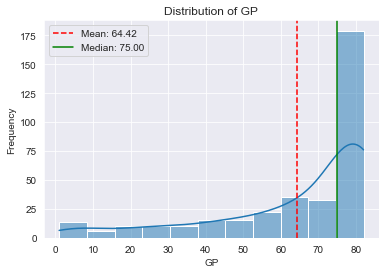

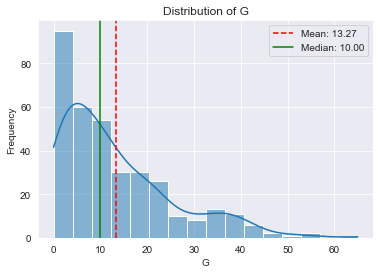

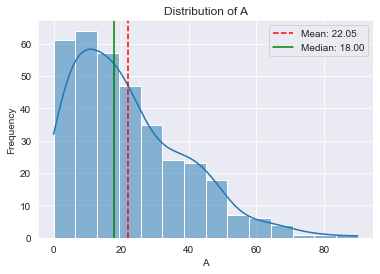

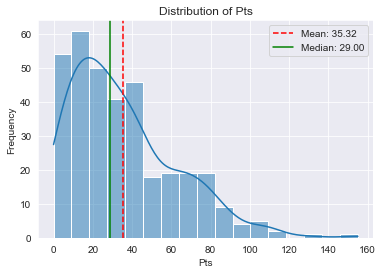

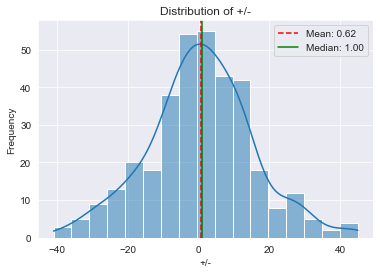

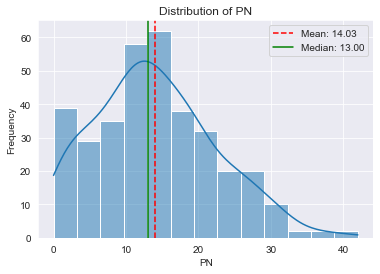

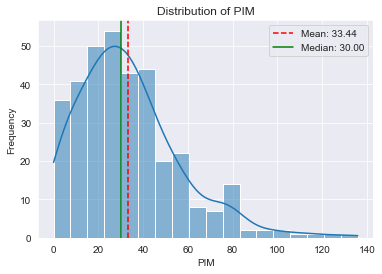

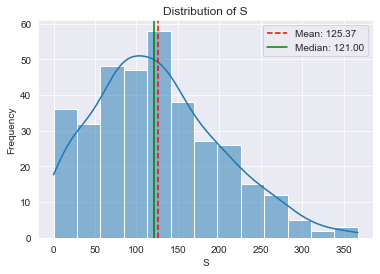

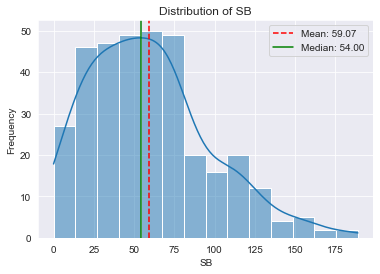

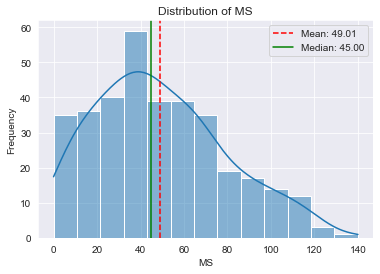

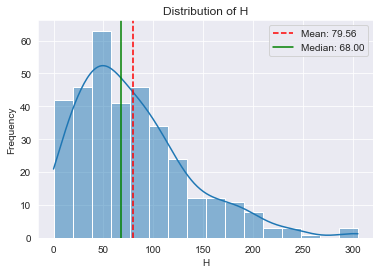

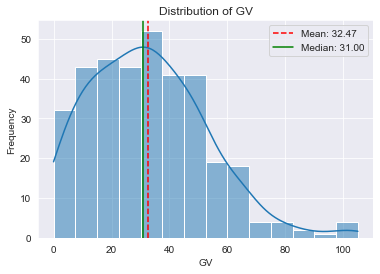

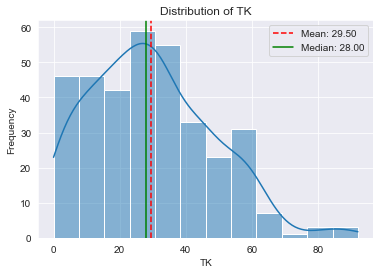

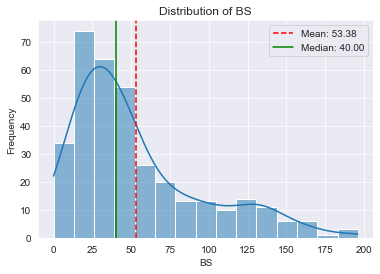

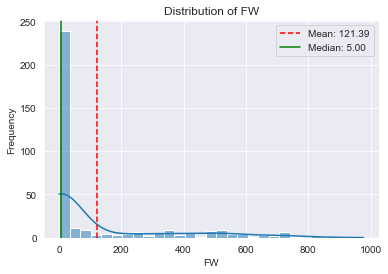

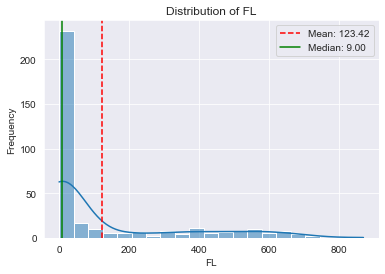

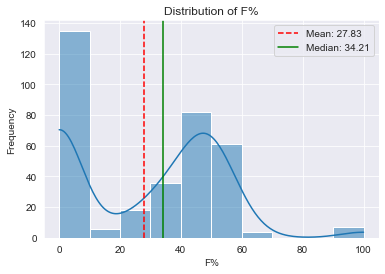

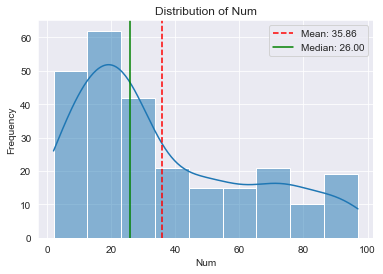

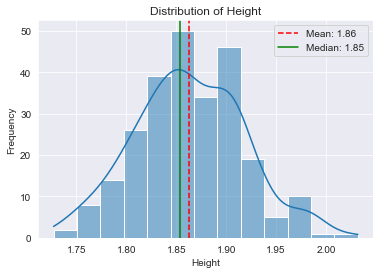

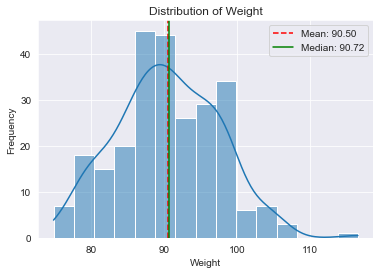

In [58]:
# Select numerical columns for normality tests
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
numerical_columns.remove('Year')

# Perform the tests
normality_results = test_normality_with_checks(df, numerical_columns)

# Update the histogram plots to include mean and median markers
for col in numerical_columns:
    if col == 'Year':  # Skip the 'Year' column as it's constant and has been removed
        continue
    
    # Calculate mean and median
    mean_val = df[col].dropna().mean()
    median_val = df[col].dropna().median()
    
    sns.histplot(df[col].dropna(), kde=True)
    
    # Add vertical lines for mean and median
    plt.axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='g', linestyle='-', label=f'Median: {median_val:.2f}')
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [59]:
# Display the test results
pd.DataFrame(normality_results)

,GP,G,A,Pts,+/-,PN,PIM,S,SB,MS,H,GV,TK,BS,FW,FL,F%,Num,Height,Weight
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,0.0,0.0,0.0,0.0,0.022262,0.000022,0.0,0.000002,0.0,0.000001,0.0,0.0,0.000001,0.0,0.0,0.0,0.0,0.0,0.000384,0.074602


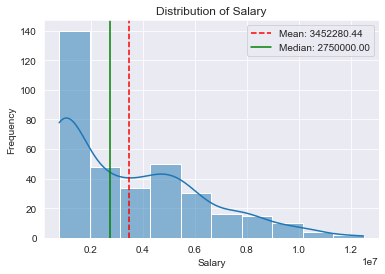

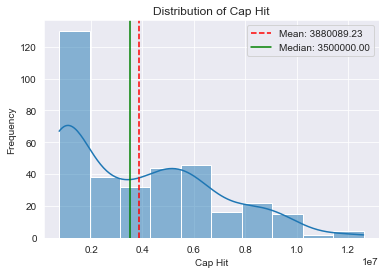

In [60]:
# Only applicable if 'Salary' and 'Cap Hit' are initially of string type
df['Salary'] = pd.to_numeric(df['Salary'].str.replace(',', ''), errors='coerce')
df['Cap Hit'] = pd.to_numeric(df['Cap Hit'].str.replace(',', ''), errors='coerce')

# Add 'Salary' and 'Cap Hit' to the list of numerical columns for normality tests
numerical_columns.extend(['Salary', 'Cap Hit'])

# Perform the tests again including these columns
normality_results_updated = test_normality_with_checks(df, ['Salary', 'Cap Hit'])

# Plot histograms for 'Salary' and 'Cap Hit'
for col in ['Salary', 'Cap Hit']:
    # Calculate mean and median
    mean_val = df[col].dropna().mean()
    median_val = df[col].dropna().median()
    
    sns.histplot(df[col].dropna(), kde=True)
    
    # Add vertical lines for mean and median
    plt.axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='g', linestyle='-', label=f'Median: {median_val:.2f}')
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [61]:
# Display the updated test results for 'Salary' and 'Cap Hit'
pd.DataFrame(normality_results_updated)

,Salary,Cap Hit
0,False,False
1,0.0,0.0


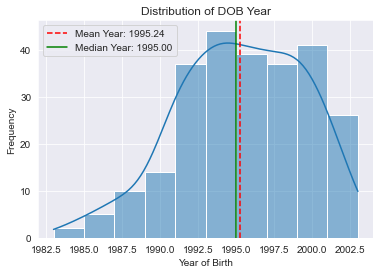

In [62]:
# Convert the 'DOB' column to datetime format if it's not already
if df['DOB'].dtype != 'datetime64[ns]':
    df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')

# Extract the year from the 'DOB' column
df['DOB_Year'] = df['DOB'].dt.year

# Add 'DOB_Year' to the list of numerical columns for normality tests
if 'DOB_Year' not in numerical_columns:
    numerical_columns.append('DOB_Year')

# Perform the normality test on 'DOB_Year'
normality_results_dob_year = test_normality_with_checks(df, ['DOB_Year'])

# Plot histogram for 'DOB_Year'
mean_dob_year = df['DOB_Year'].dropna().mean()
median_dob_year = df['DOB_Year'].dropna().median()

sns.histplot(df['DOB_Year'].dropna(), kde=True)

# Add vertical lines for mean and median
plt.axvline(mean_dob_year, color='r', linestyle='--', label=f'Mean Year: {mean_dob_year:.2f}')
plt.axvline(median_dob_year, color='g', linestyle='-', label=f'Median Year: {median_dob_year:.2f}')

plt.title('Distribution of DOB Year')
plt.xlabel('Year of Birth')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [63]:
# Display the normality test result for 'DOB_Year'
pd.DataFrame(normality_results_dob_year)

,DOB_Year
0,False
1,0.000236


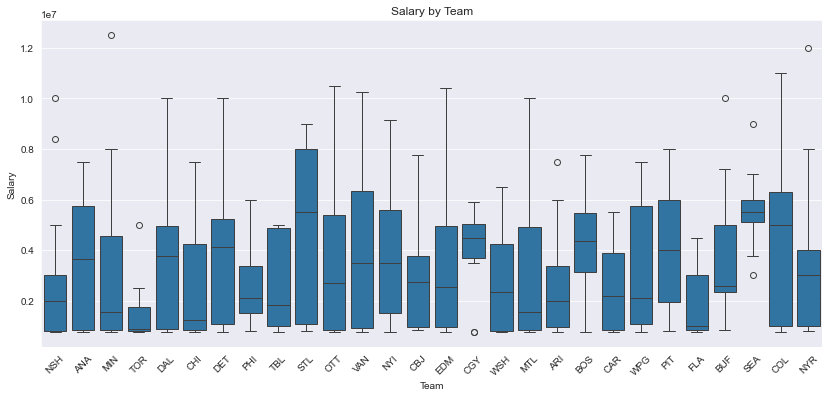

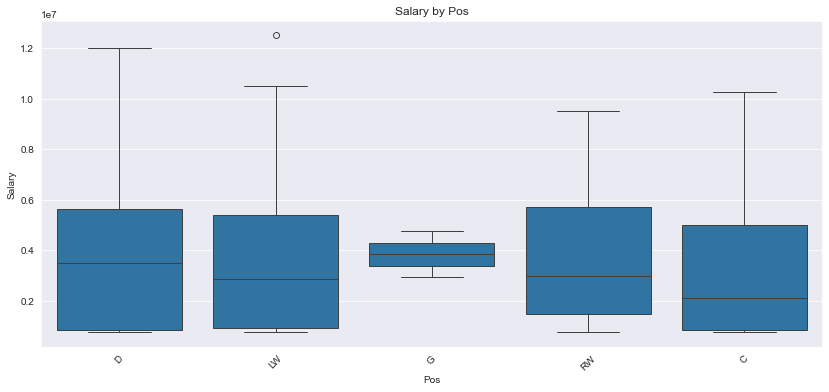

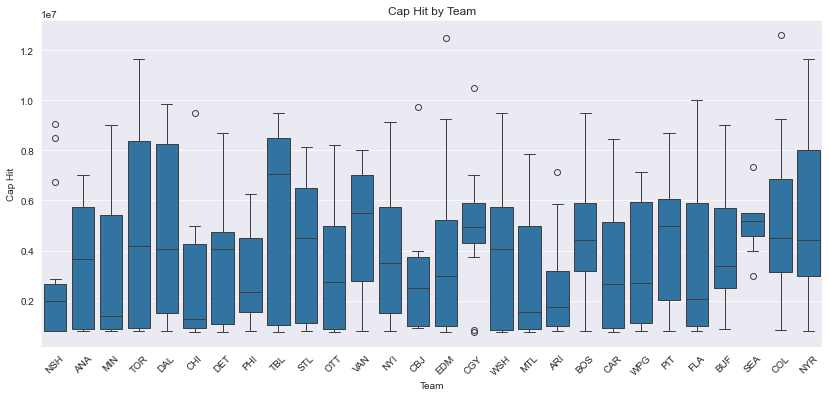

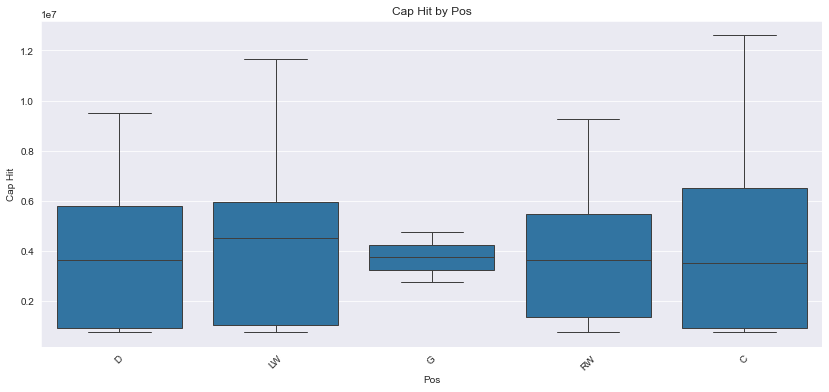

In [64]:
# Select categorical columns for the box plots
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Remove '_merge' from the list of categorical columns
if '_merge' in categorical_columns:
    categorical_columns.remove('_merge')

# Remove 'Player' from the categorical columns as it's unique for each record and won't be useful for the box plots
if 'Player' in categorical_columns:
    categorical_columns.remove('Player')

# Remove 'DOB' from the list of categorical columns if it's present
if 'DOB' in categorical_columns:
    categorical_columns.remove('DOB')

# Plot box plots for Salary and Cap Hit against the remaining categorical variables
for target in ['Salary', 'Cap Hit']:
    for cat_var in categorical_columns:
        plt.figure(figsize=(14, 6))
        sns.boxplot(x=cat_var, y=target, data=df)
        plt.title(f'{target} by {cat_var}')
        plt.xticks(rotation=45)
        plt.show()

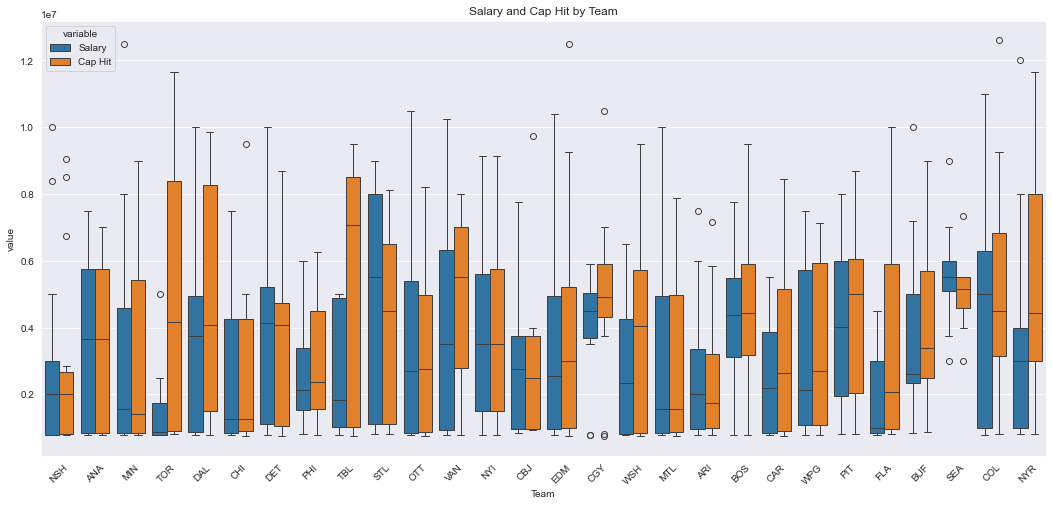

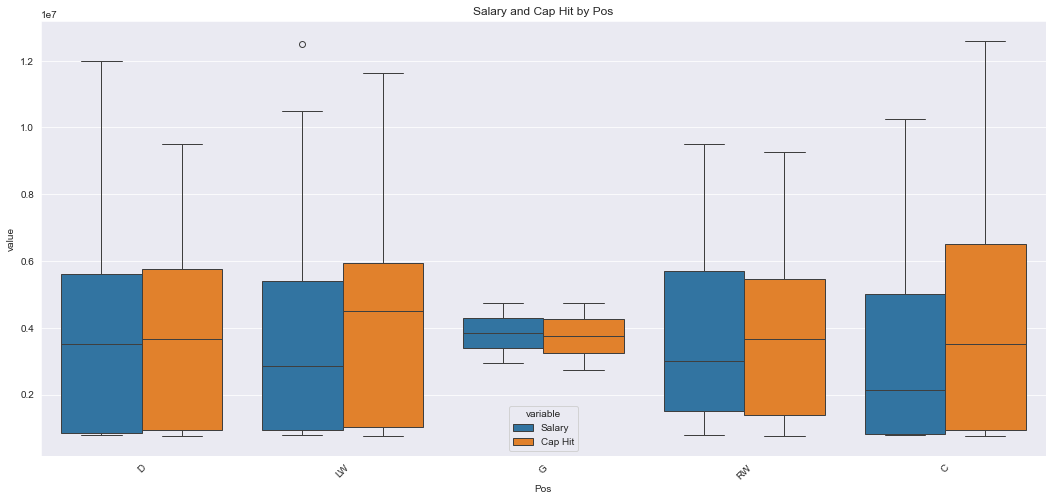

In [65]:
# Combine the box plots to compare Salary and Cap Hit against the remaining categorical variables
for cat_var in categorical_columns:
    plt.figure(figsize=(18, 8))
    sns.boxplot(x=cat_var, y='value', hue='variable', data=df.melt(id_vars=[cat_var], value_vars=['Salary', 'Cap Hit']))
    plt.title(f'Salary and Cap Hit by {cat_var}')
    plt.xticks(rotation=45)
    plt.show()

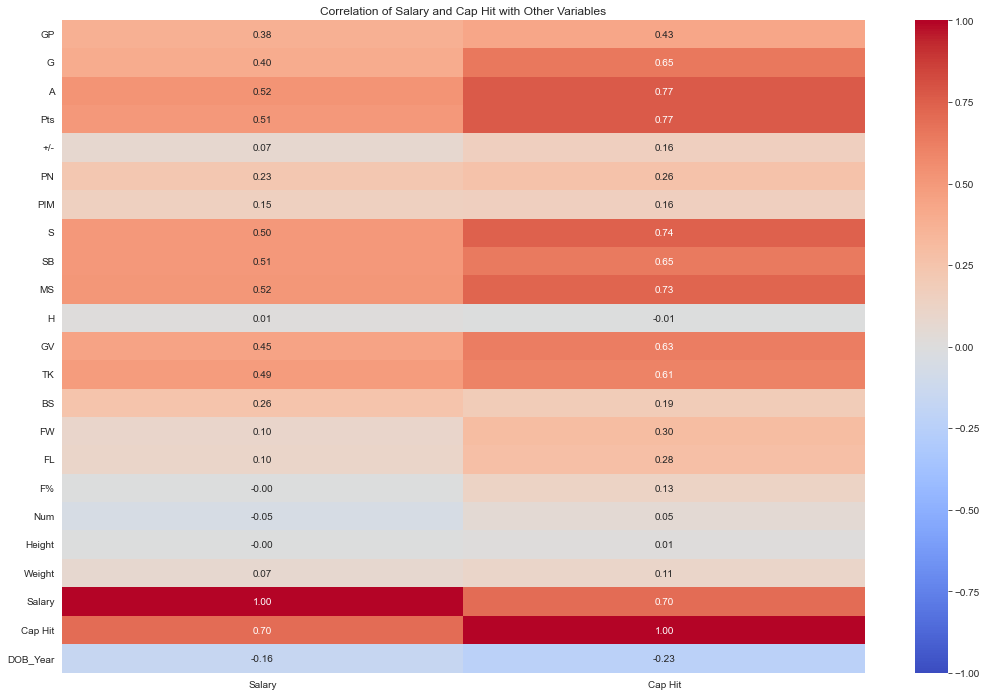

In [73]:
# Create a DataFrame containing only numerical variables of interest for correlation analysis
correlation_df = df[numerical_columns].copy()

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Plot the correlation matrix focusing on 'Salary' and 'Cap Hit'
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix[['Salary', 'Cap Hit']], annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation of Salary and Cap Hit with Other Variables')
plt.show()

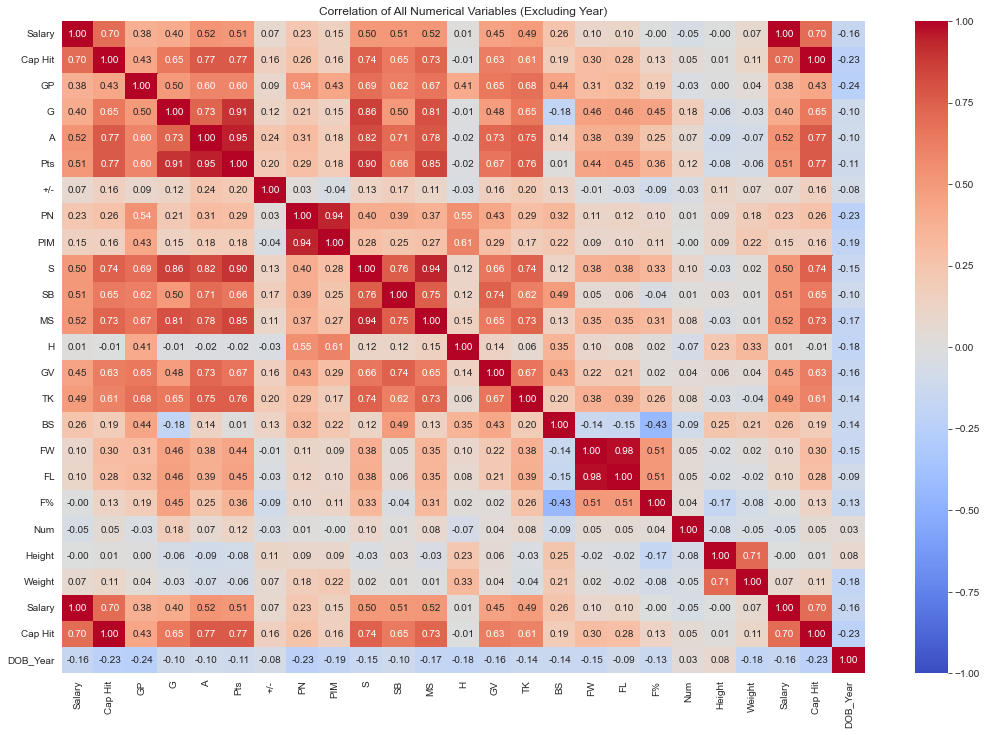

In [67]:
# Remove 'Year' column from the correlation DataFrame if it exists
if 'Year' in correlation_df.columns:
    correlation_df.drop(columns=['Year'], inplace=True)

# Recalculate the correlation matrix without the 'Year' column
full_correlation_matrix_without_year = correlation_df.corr()

# Plot the correlation matrix without the 'Year' column
plt.figure(figsize=(18, 12))
sns.heatmap(full_correlation_matrix_without_year, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation of All Numerical Variables (Excluding Year)')
plt.show()

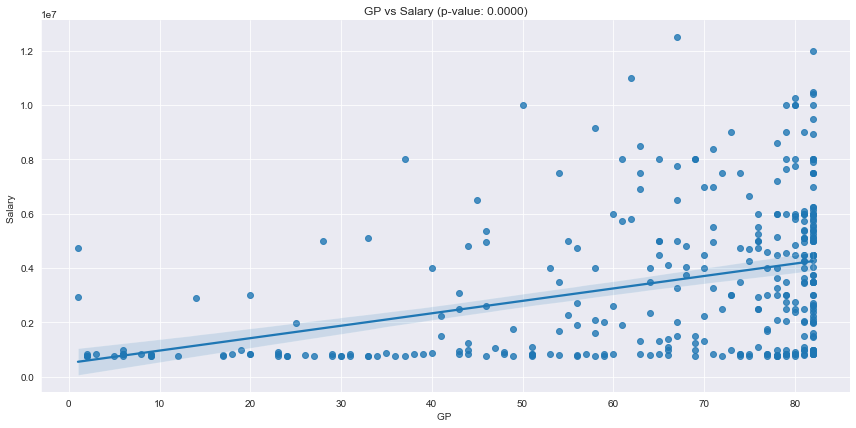

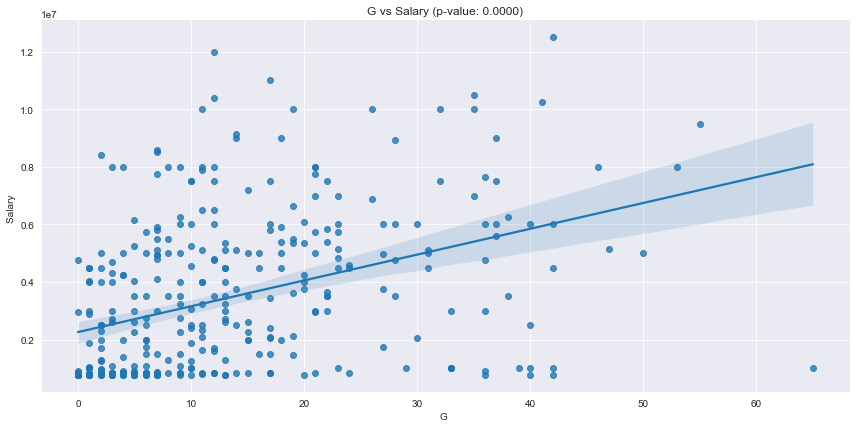

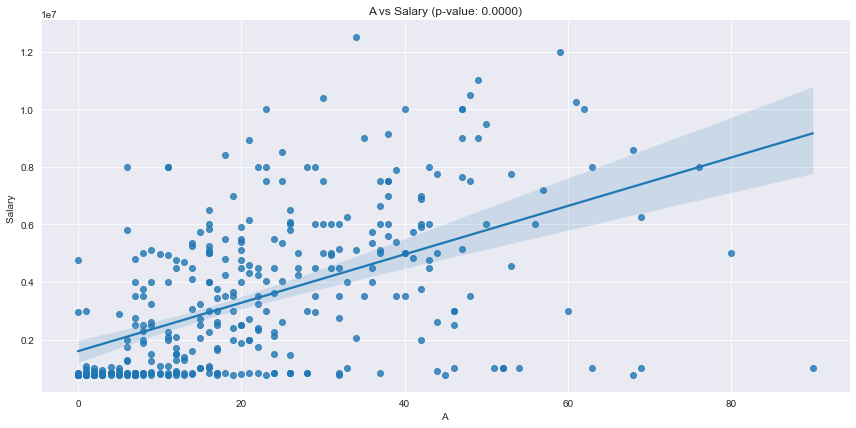

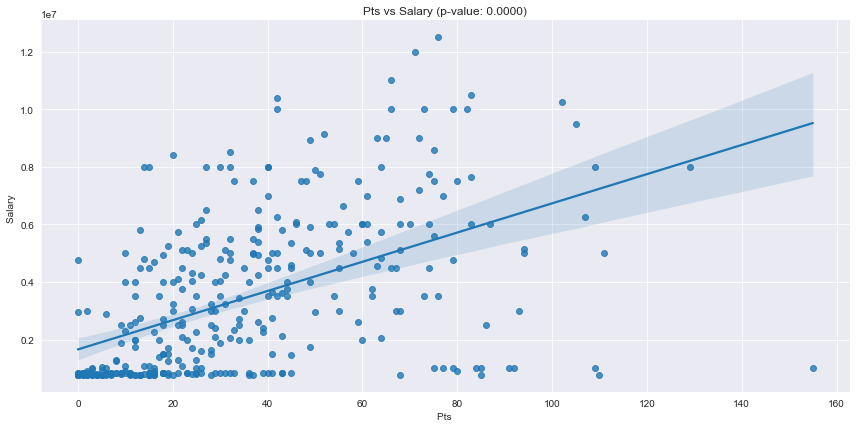

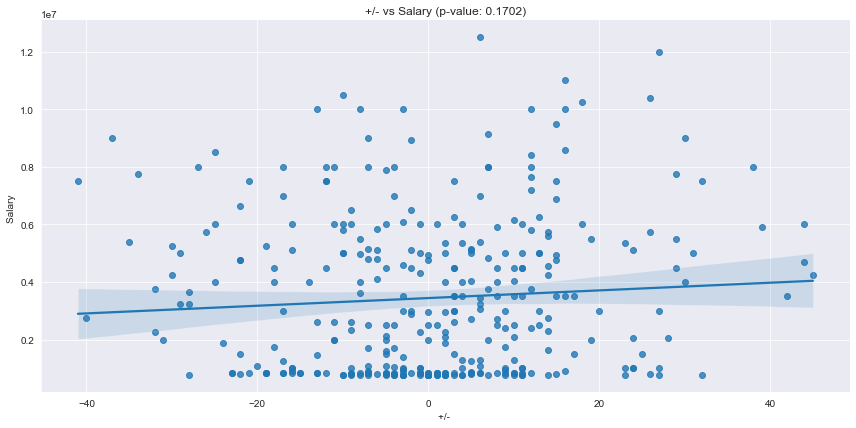

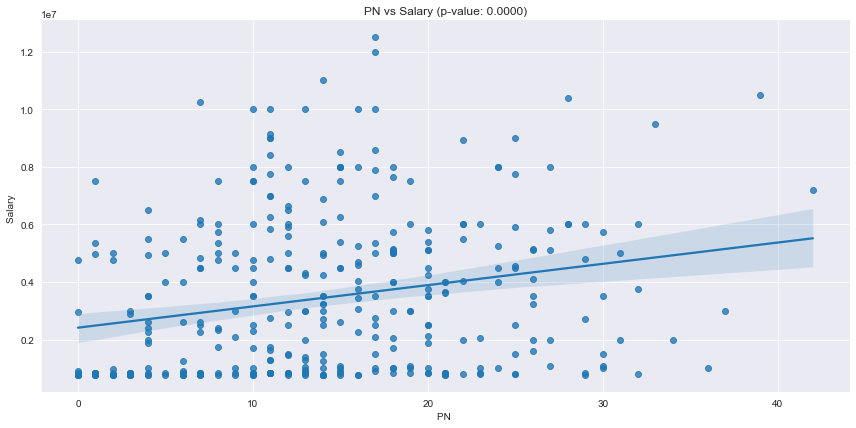

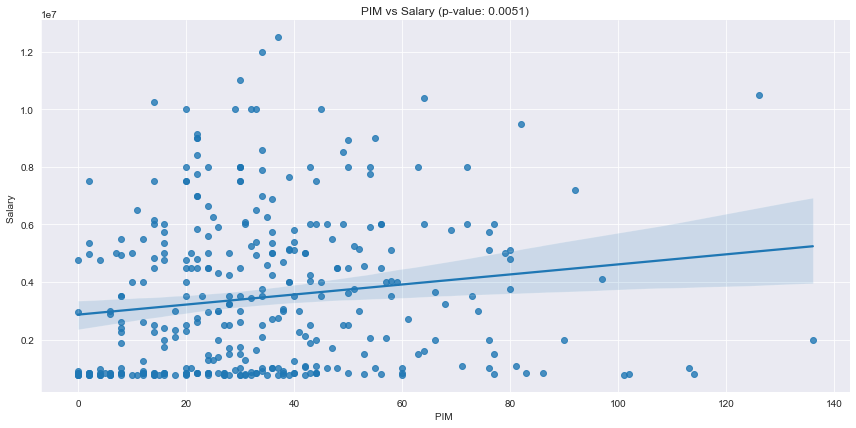

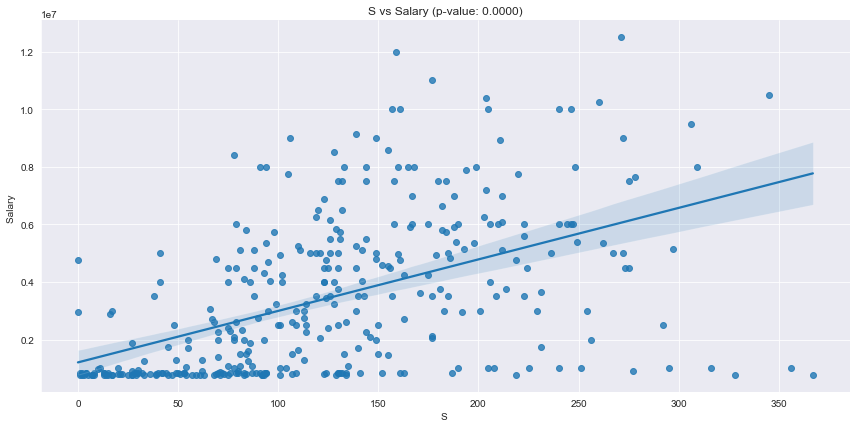

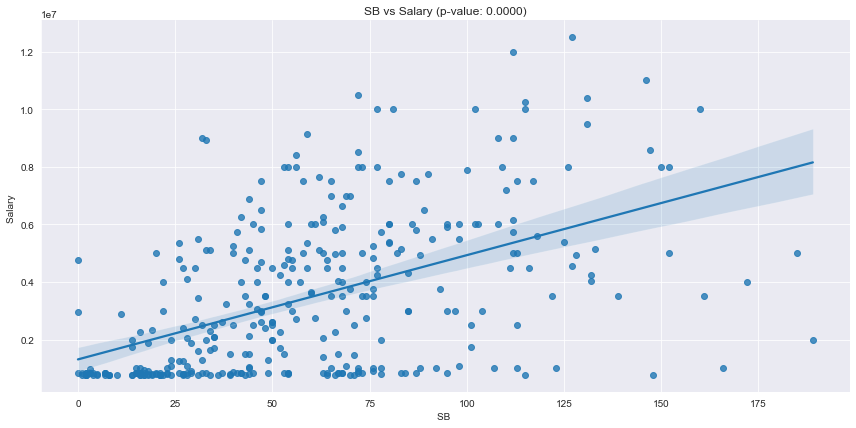

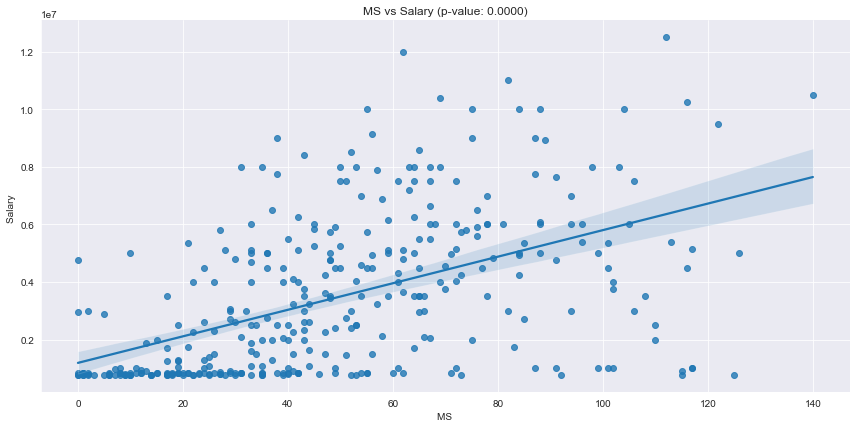

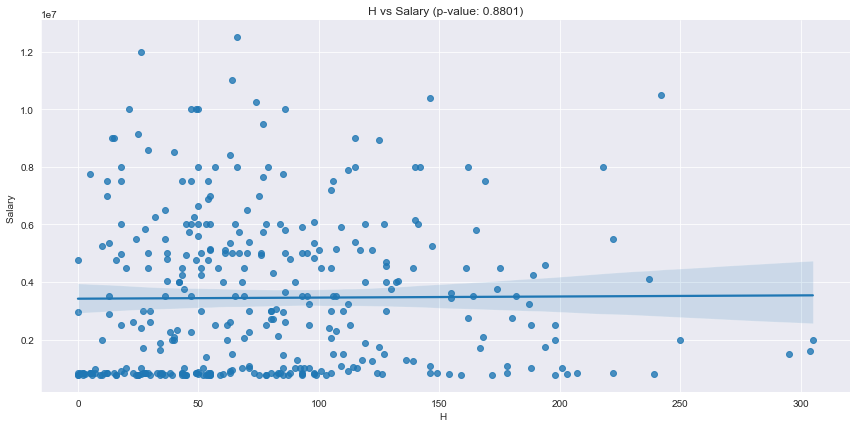

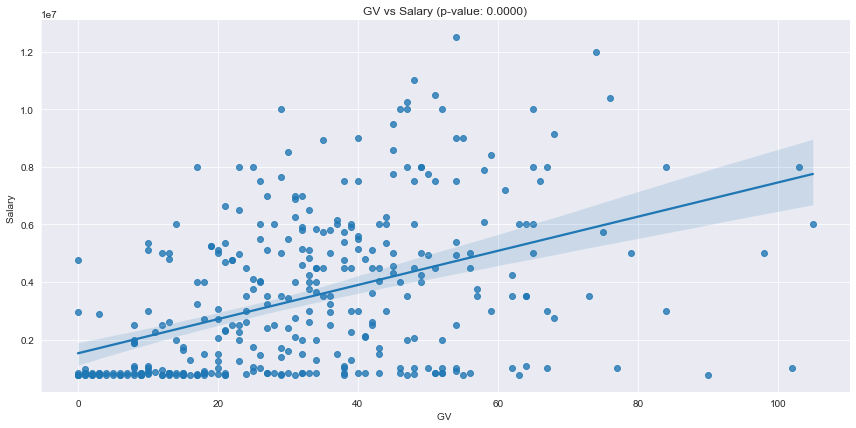

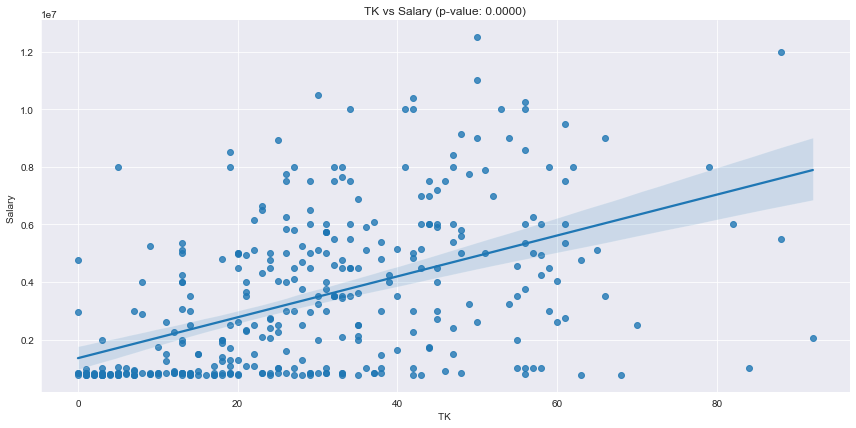

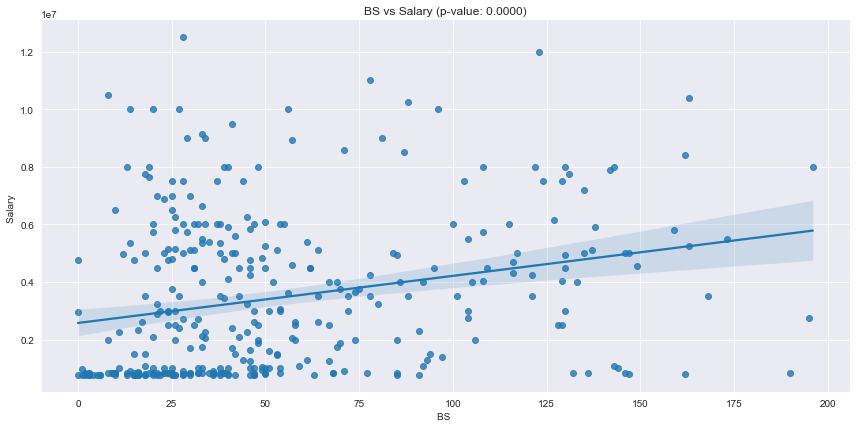

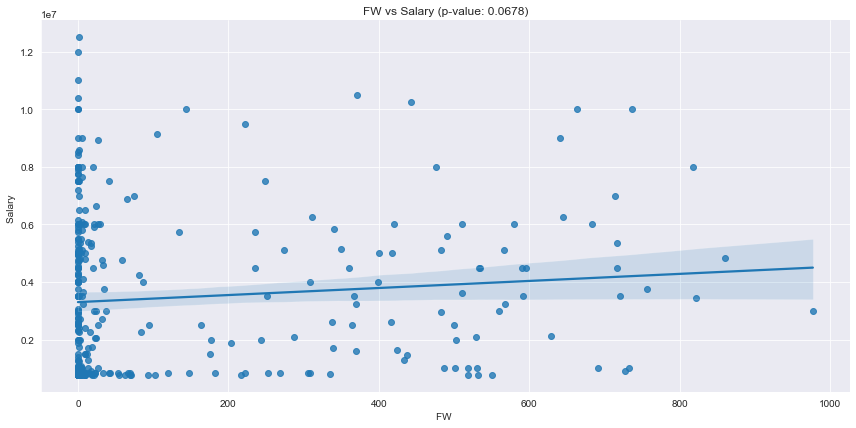

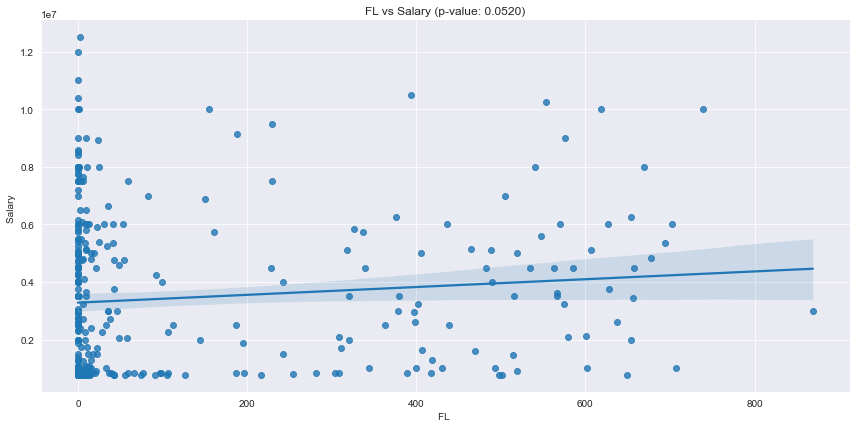

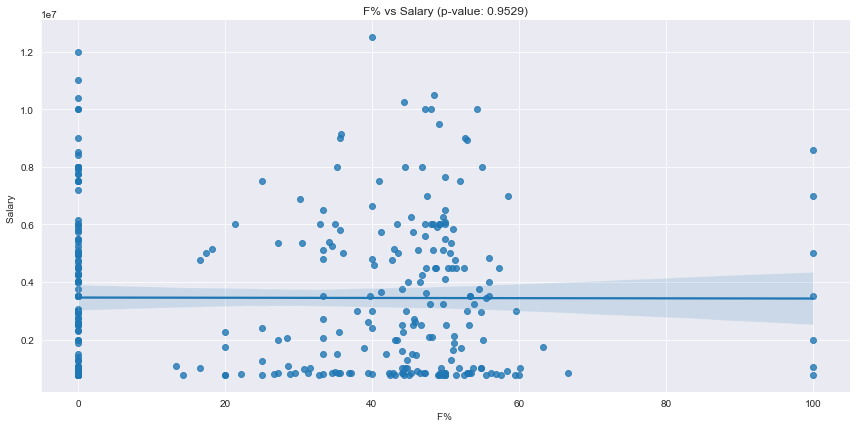

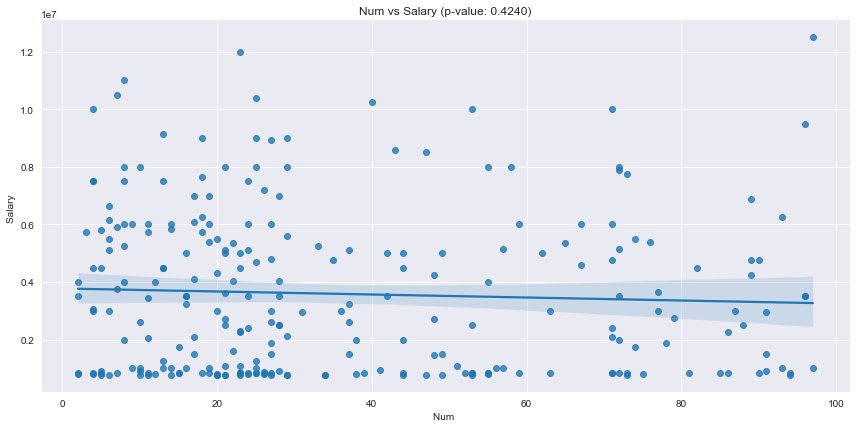

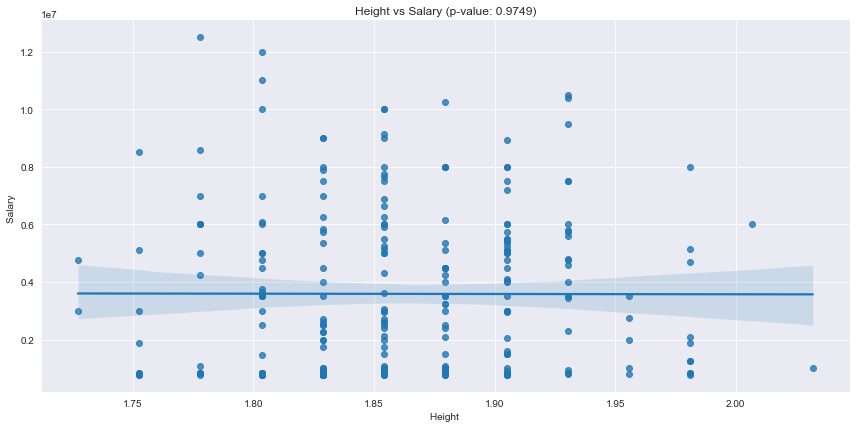

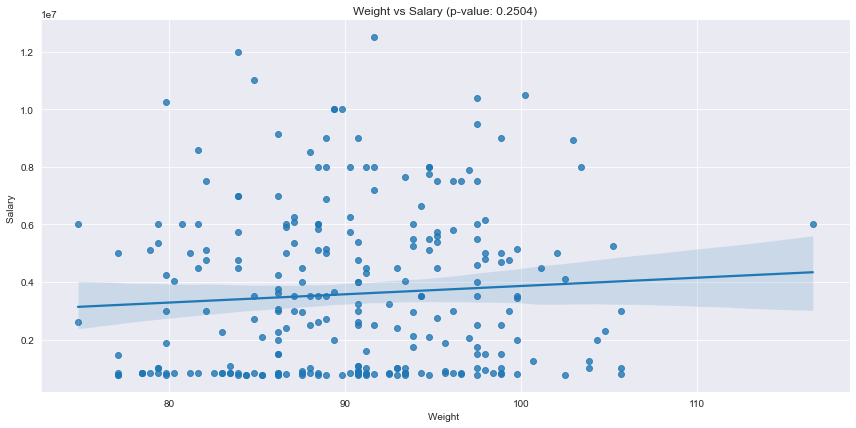

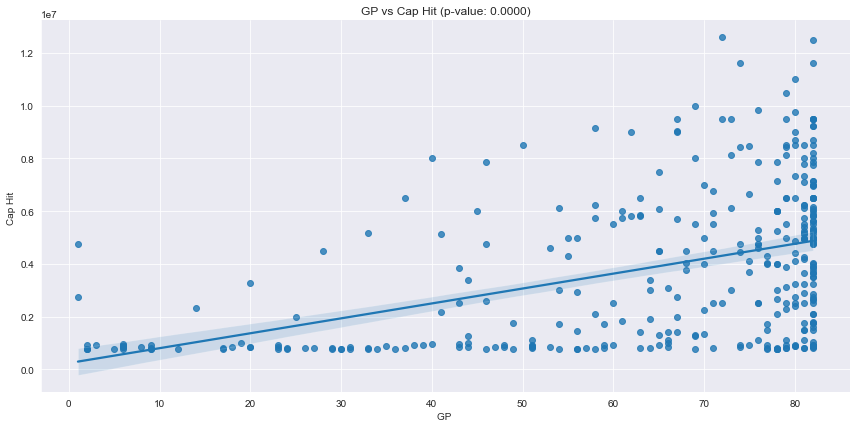

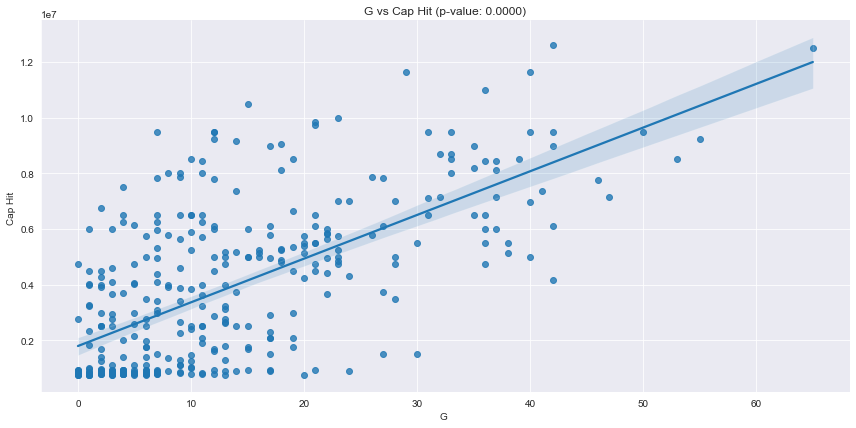

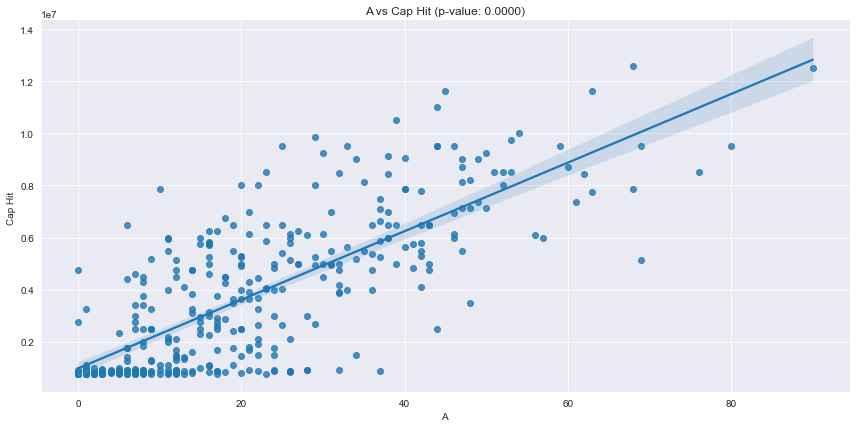

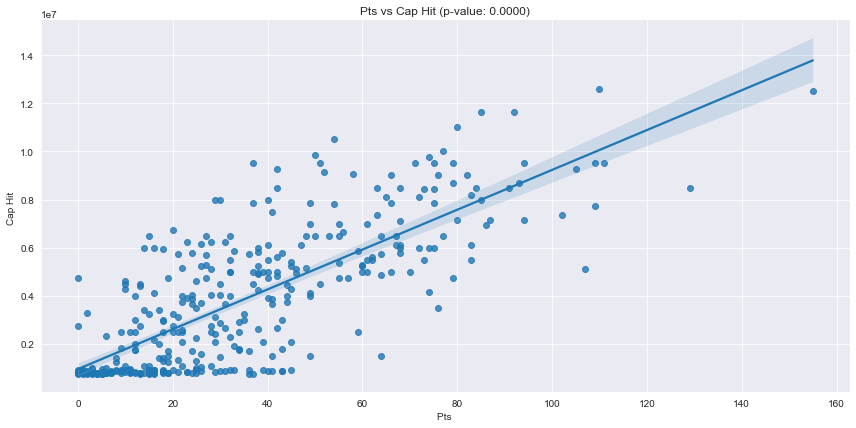

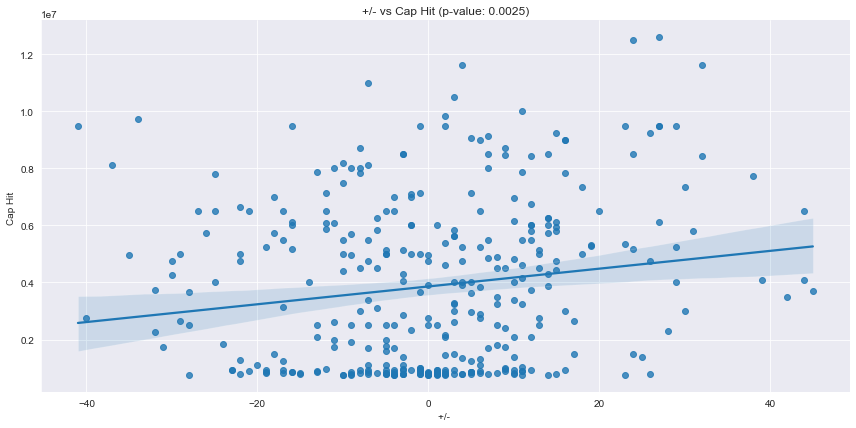

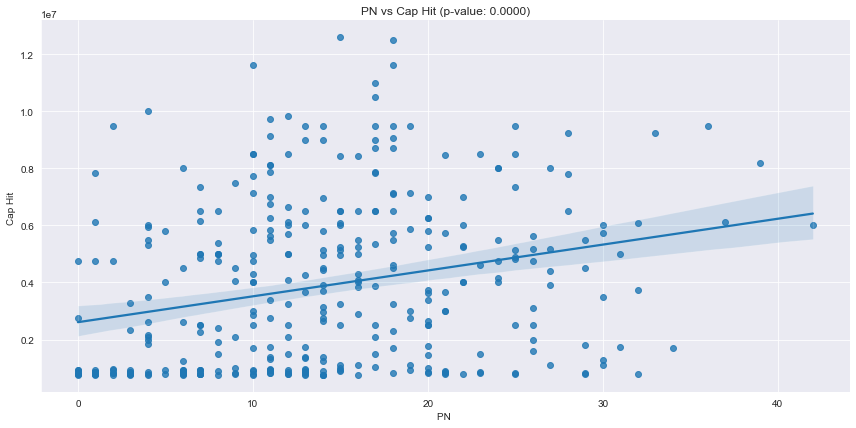

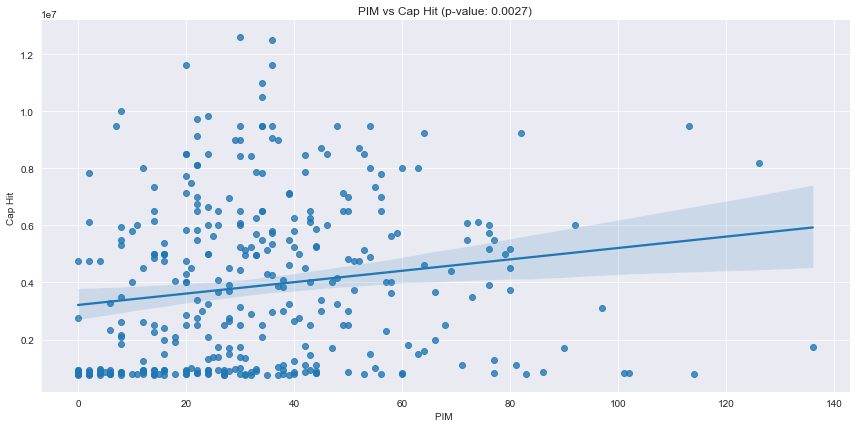

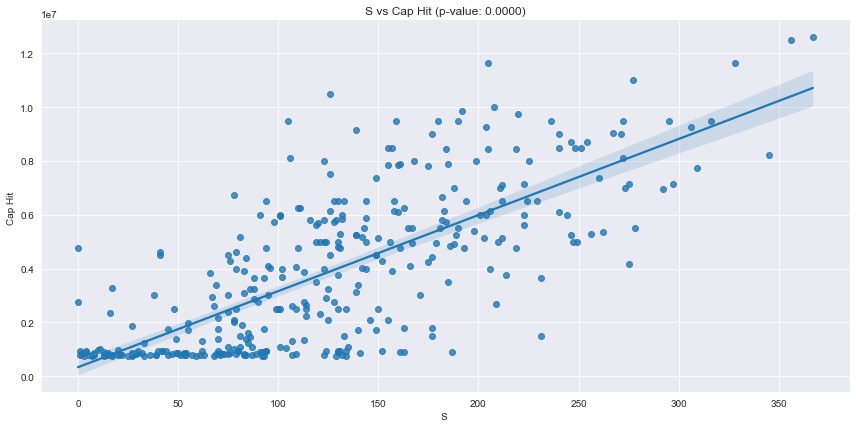

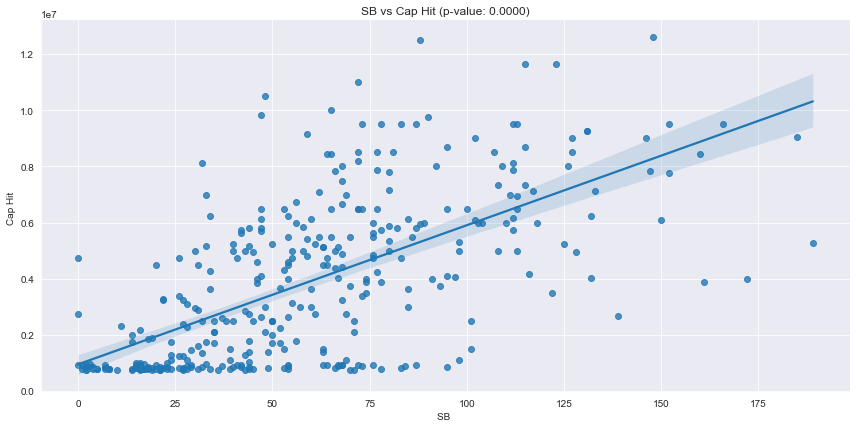

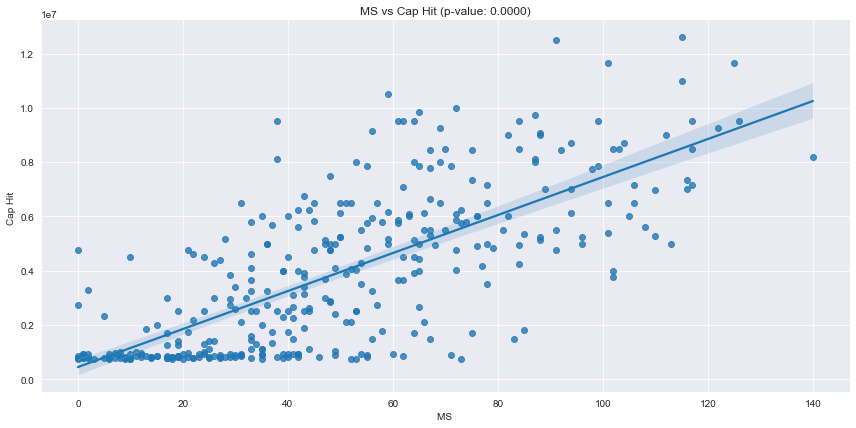

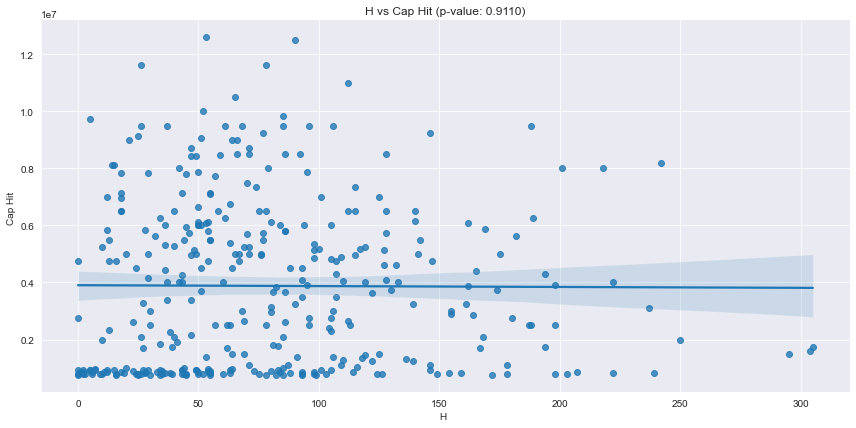

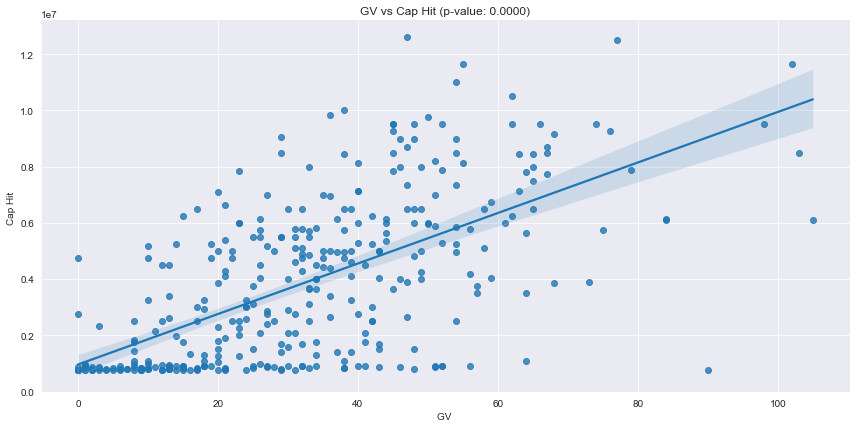

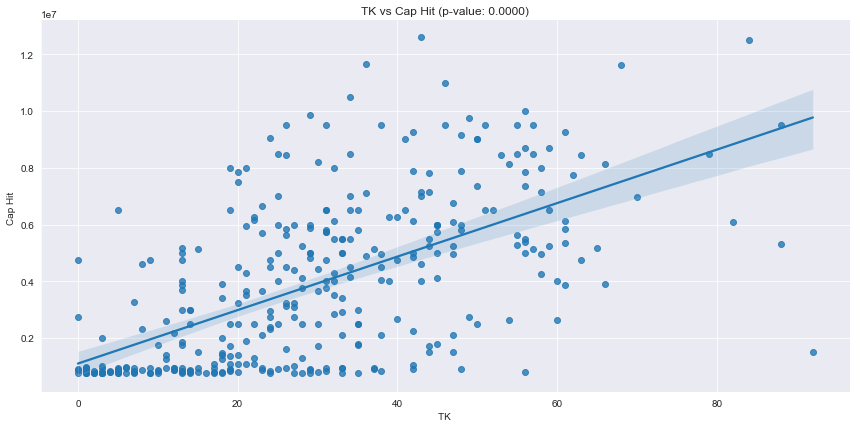

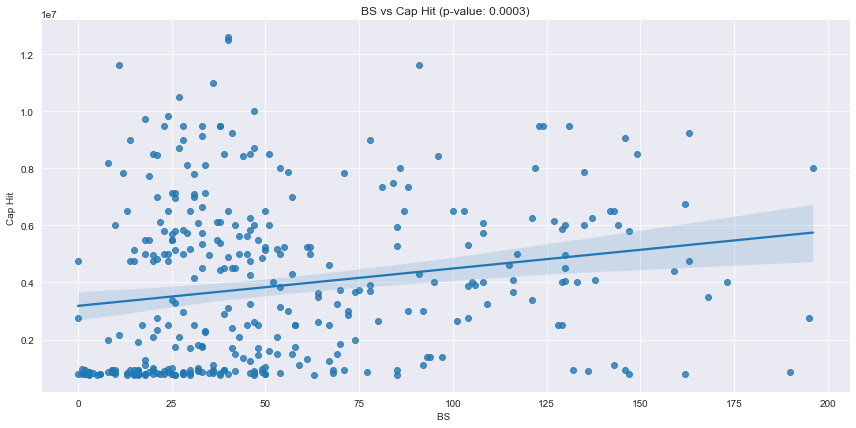

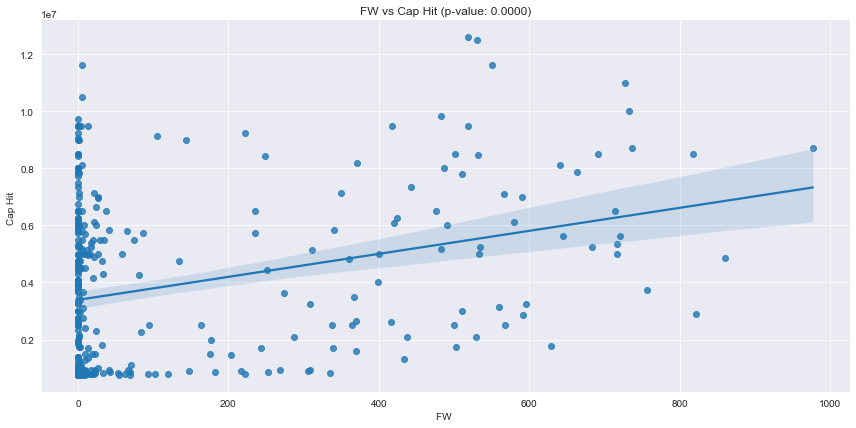

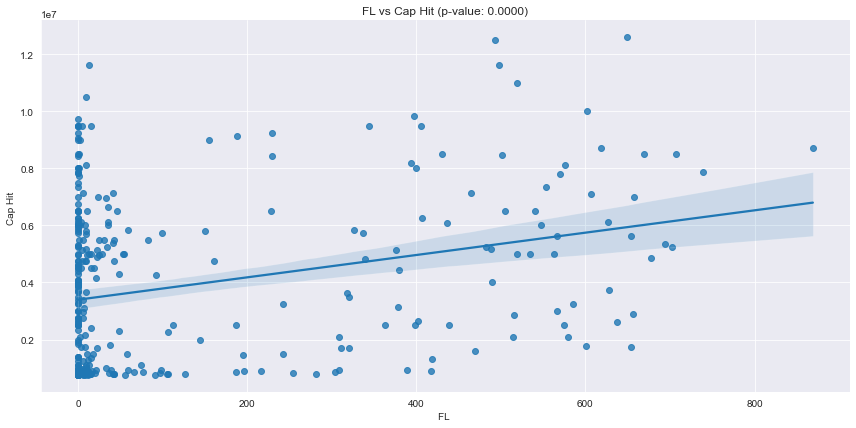

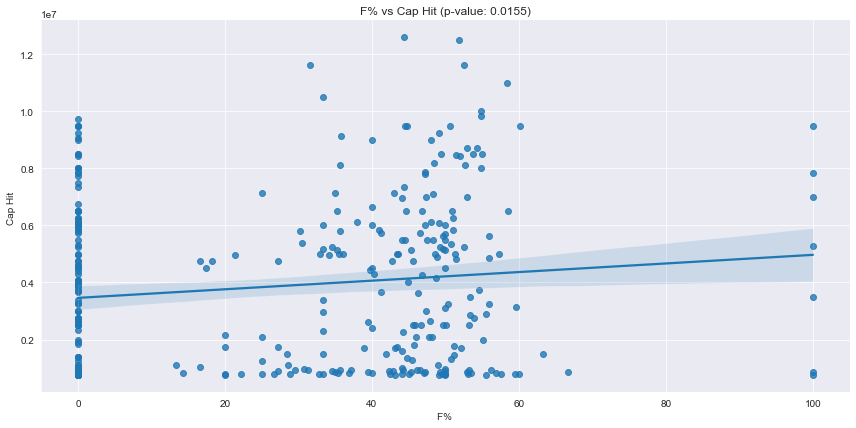

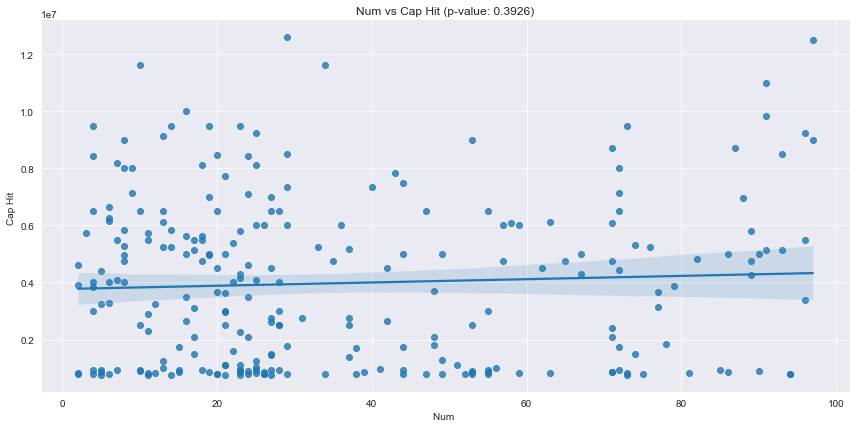

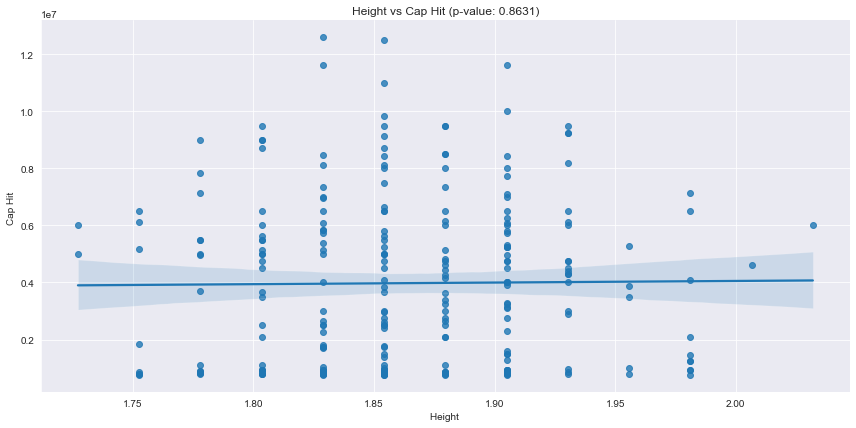

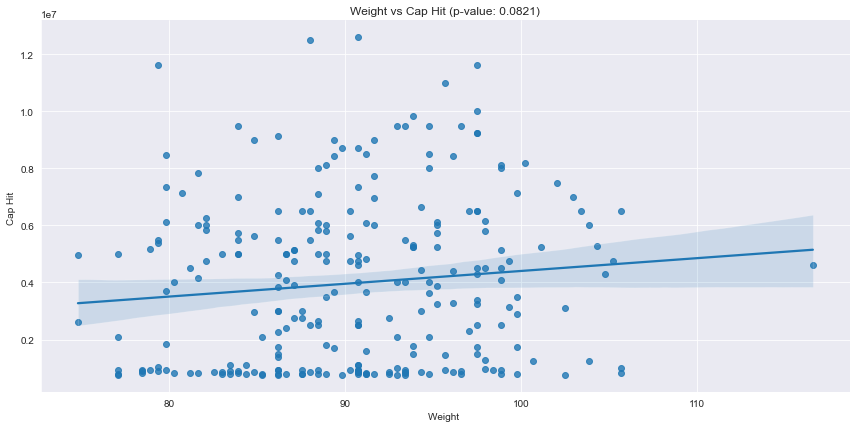

In [68]:
from scipy.stats import pearsonr


def calculate_p_values_and_plot_adjusted_v4(test_df, features, targets=None):
    """
    Calculate p-values for the correlation between features and targets, and plot scatter plots with regression lines.
    Adjusts for log scales based on data range and skewness using plt.xscale or plt.y-scale, but not both at the same time.
    
    Parameters:
        test_df (pd.DataFrame): The DataFrame containing the data.
        features (list): List of feature column names to analyze.
        targets (list): List of target column names to analyze, default is ['Salary', 'Cap Hit'].

    Returns:
        dict: A dictionary where keys are (feature, target) pairs and values are p-values.
    """
    if targets is None:
        targets = ['Salary', 'Cap Hit']
    p_values = {}
    
    for test_target in targets:
        for feature in features:
            # Drop NaN values for this pair for accurate calculation
            data_pair = test_df[[feature, test_target]].dropna()
            
            # Determine whether to use log scale for x or y based on range and skewness of data
            x_range = data_pair[feature].max() - data_pair[feature].min()
            y_range = data_pair[test_target].max() - data_pair[test_target].min()
            x_skew = data_pair[feature].skew()
            y_skew = data_pair[test_target].skew()
            
            use_log_x = (x_range > 1000) and (abs(x_skew) > 1) and (y_range <= 1000 or abs(y_skew) <= 1)
            use_log_y = (y_range > 1000) and (abs(y_skew) > 1) and (x_range <= 1000 or abs(x_skew) <= 1)

            # Calculate p-value using Pearson's correlation
            if len(data_pair) >= 3:  # At least 3 data points are required
                _, p_value = pearsonr(data_pair[feature], data_pair[test_target])
                p_values[(feature, test_target)] = p_value

                # Plot scatter plot with regression line
                sns.lmplot(x=feature, y=test_target, data=data_pair, aspect=2, height=6)
                
                if use_log_x:
                    plt.xscale('log')
                if use_log_y:
                    plt.yscale('log')
                
                plt.xlabel(f"{feature} {'(Log Scale)' if use_log_x else ''}")
                plt.ylabel(f"{test_target} {'(Log Scale)' if use_log_y else ''}")
                plt.title(f'{feature} vs {test_target} (p-value: {p_value:.4f})')
                plt.show()
            else:
                p_values[(feature, test_target)] = None  # Insufficient data points to calculate p-value
    
    return p_values

# List of features to analyze (excluding 'Year', 'Salary', 'Cap Hit', and 'DOB_Year')
features_to_analyze = [col for col in numerical_columns if col not in ['Year', 'Salary', 'Cap Hit', 'DOB_Year']]

# Calculate p-values and plot for a limited set of features to avoid memory issues
limited_features = features_to_analyze[:]  # Adjust this to include more or fewer features
p_values_results_adjusted_v3 = calculate_p_values_and_plot_adjusted_v4(df, limited_features)

In [69]:
# Convert the dictionary of p-values to a Pandas Series for easier manipulation
p_values_series = pd.Series(p_values_results_adjusted_v3, name='p-value')

# Create a DataFrame from the Series
p_values_df = p_values_series.reset_index()
p_values_df.columns = ['Feature', 'Target', 'p-value']

# Add a column indicating whether the p-value is less than 0.05
p_values_df['p < 0.05'] = p_values_df['p-value'] < 0.05

p_values_df

,Feature,Target,p-value,p < 0.05
0,GP,Salary,3.665724e-13,True
1,G,Salary,7.275291e-15,True
2,A,Salary,5.766948e-26,True
3,Pts,Salary,4.353137e-24,True
4,+/-,Salary,1.702205e-01,False
5,PN,Salary,1.610750e-05,True
6,PIM,Salary,5.079150e-03,True
7,S,Salary,8.346348e-24,True
8,SB,Salary,4.282546e-24,True
9,MS,Salary,4.940773e-25,True


In [70]:
from scipy.stats import stats


def perform_anova_filtered(test_df, dependent_var, independent_vars):
    """
    Perform ANOVA to test the impact of multiple independent variables on a dependent variable.
    Filters out groups with fewer than two observations.
    
    Parameters:
        test_df (pd.DataFrame): The DataFrame containing the data.
        dependent_var (str): The name of the dependent variable column.
        independent_vars (list): List of independent variable column names to analyze.
        
    Returns:
        dict: A dictionary where keys are the independent variable names and values are the ANOVA F and p-values.
    """
    anova_results = {}
    
    for var in independent_vars:
        groups = [group[dependent_var].dropna() for name, group in test_df.groupby(var) if len(group[dependent_var].dropna()) >= 2]
        # Perform one-way ANOVA
        if len(groups) >= 2:  # At least two groups are required for ANOVA
            f_val, p_val = stats.f_oneway(*groups)
            anova_results[var] = {'F-value': f_val, 'p-value': p_val}
        else:
            anova_results[var] = {'F-value': None, 'p-value': None}
    
    return anova_results

# Independent variables for ANOVA (excluding continuous and non-categorical variables)
anova_independent_vars = [col for col in df.columns if col not in numerical_columns + ['Player', 'DOB', '_merge']]

# Remove 'Year' from the list of independent variables for ANOVA if it exists
if 'Year' in anova_independent_vars:
    anova_independent_vars.remove('Year')

# Perform ANOVA again with filtering and without the 'Year' column
anova_results_salary_filtered_no_year = perform_anova_filtered(df, 'Salary', anova_independent_vars)
anova_results_cap_hit_filtered_no_year = perform_anova_filtered(df, 'Cap Hit', anova_independent_vars)

# Convert the results to DataFrames for better readability
anova_df_salary_filtered_no_year = pd.DataFrame(anova_results_salary_filtered_no_year).T
anova_df_salary_filtered_no_year['p < 0.05'] = anova_df_salary_filtered_no_year['p-value'] < 0.05

anova_df_cap_hit_filtered_no_year = pd.DataFrame(anova_results_cap_hit_filtered_no_year).T
anova_df_cap_hit_filtered_no_year['p < 0.05'] = anova_df_cap_hit_filtered_no_year['p-value'] < 0.05

C:\Users\user\AppData\Local\Temp\ipykernel_18992\33337708.py:23: DeprecationWarning: Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  f_val, p_val = stats.f_oneway(*groups)


In [71]:
anova_df_salary_filtered_no_year

,F-value,p-value,p < 0.05
Team,1.199034,0.231114,False
Pos,0.546559,0.701700,False


In [72]:
anova_df_cap_hit_filtered_no_year

,F-value,p-value,p < 0.05
Team,1.159342,0.270558,False
Pos,0.660679,0.619872,False
